Toto je import balíčků:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Tímto mastavíme základní parametry simulace

In [2]:
pocet_lidi=2000
pocet_iteraci=4*24*10
cas_krok=15

Vytvoříme okna pro pozdější vykreslování průběhu simulace

<IPython.core.display.Javascript object>


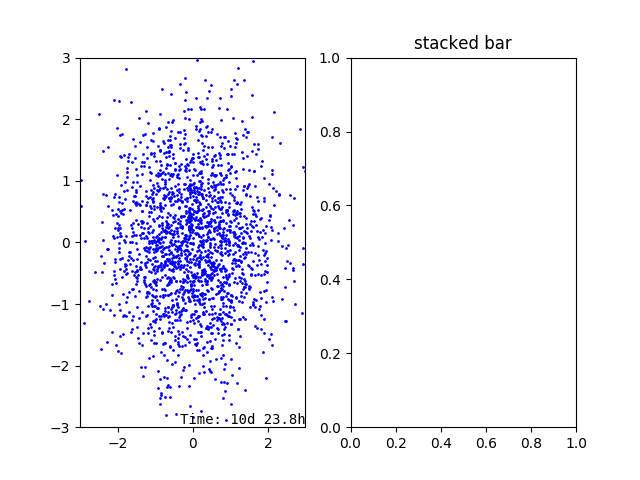

Text(0.5, 1.0, 'stacked bar')

In [6]:
%matplotlib notebook
fig, axs = plt.subplots(ncols=2)
ln, = axs[0].plot([], [], 'bo')
ln.set_markersize(1)
title = axs[0].text(1,0, "",transform=axs[0].transAxes, ha="right", va="bottom")
title.set_fontfamily('monospace')

axs[0].set_xlim(-3, 3)
axs[0].set_ylim(-3, 3)
ln.set_xdata(np.random.randn(pocet_lidi,1))
ln.set_ydata(np.random.randn(pocet_lidi,1))

n_bins=np.zeros((pocet_iteraci,3))
axs[1].set_title('stacked bar')

Vyrobíme funkci která v každém časovém kroku udělá krok naší simulace

In [7]:
def update(cas_simulace_minuty):
    ln.set_xdata(ln.get_xdata()+np.random.randn(pocet_lidi,1)/100)
    ln.set_ydata(ln.get_ydata()+np.random.randn(pocet_lidi,1)/100)

    cas_simulace_hodiny = np.mod(cas_simulace_minuty/60,24)
    cas_simulace_dny = cas_simulace_minuty/24/60

    title.set_text("Time: {:2.0f}d {:4.1f}h".format(cas_simulace_dny,cas_simulace_hodiny))

    return ln,title,

A spustíme simulaci a zároveň animaci simulace

In [8]:
ani = FuncAnimation(fig, update, frames=range(0,pocet_iteraci*cas_krok,cas_krok), blit=True,interval=1,repeat=False)
plt.show()